# Assignment 4: Mid Point Review

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

# Linear Regression:
Linear Regression is the process of taking a dataset of independent variables and a continuous dependent variable and finding the parameters of a linear model that expresses our dependent variable as a linear combination of the independent variables (features). 

# Polynomial Regression:
Polynomial regression is similar to linear regression but we increase the complexity of our model by incorporating powers of the linear featuress as new features; although the curve we are fitting is not linear in nature, our model is still considered linear because the weights associated to each feature is still linear. 

# Underfitting/Overfitting:
Underfitting occurs when the parameters have not been tuned enough to capture the patterns in the data. A method of overcoming underfitting is to increase the complexity of our model (ex. performing polynomial regression rather than linear regression); however, this can lead to a process called overfitting which occurs when the parameters of your model have captured the noise in your training data. Thus the model is unable to be applied in general over unseen data like the validation or test set. Overcoming overfitting involves increasing the flexibility of your model, which can be done through regularization techniques.

### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

# Logistic Regression:
(A little deceptively named), logistic regression is the process that is used in classification problems (i.e. when the target binary variable is discrete and categorical). A logistic function is used to model this binary dependent variable and we perform regression to estimate the parameters of the model.

# Linear SVM:
Linear Support Vector Machines (SVM) are discriminative classifiers used as a supervised machine learning algorithm typically applied to classification problems, similar to the dichotomous scenario seen when implementing logistic regression; however, this process entails plotting each element of a dataset with n features in n-dimensional space, and identify the hyperplane that "best" segregates two classes. To clear up the ambiguity of what the "best" hyperplane is, we measure the margin, which is the maximal distance between the nearest data point from either class and the hyperplane. These points closer to the hyperplane are called support vectors. Kernels are functions that map data to higher dimensions in order to manipulate the plane such that the data becomes linearly separable. Once the hyperplane has been defined in higher dimension space, we can apply another transformation that projects back to the original plane to determine the decision boundary that segregates our two classes. If we have a training set that isn't linearly separable, we can also introduce slack variables when there's a small overlapping region in a generally spatially separated dataset to "relax" the stiff margin of separability.


# SVM Usage Example:
A linear kernel is unable to separate this data, but we can use a kernel function that transforms our two data points such that the data becomes separable.

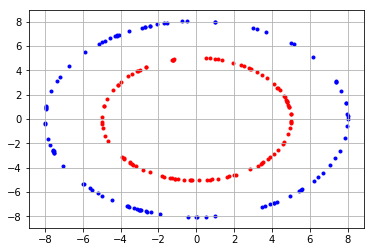

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random

radius_1 = 5
radius_2 = 8

num_points = 100
angle1 = np.random.rand(num_points)*2*np.pi
angle2 = np.random.rand(num_points)*2*np.pi

x_1, y_1 = (radius_1)*np.cos(angle1), (radius_1+ np.random.random_sample())*np.sin(angle1)
x_2, y_2 = (radius_2)*np.cos(angle2), (radius_2+ np.random.random_sample())*np.sin(angle2)

plt.figure()
plt.scatter(x_1, y_1, marker = '.', c='r')
plt.scatter(x_2, y_2, marker = '.', c='b')
plt.grid()

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- K-NN is an example of a lazy learning algorithm. Why is it called so. What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

# Linear SVM vs k-NN
Supervised learning is when we have known input variables and output variables, and an algorithm is initiated to learn a mapping function from the input to the output (ex. classification or regression problems). Unsupervised learning is when we have our input features but we have no corresponding labels (they are UNKNOWN), i.e. we are trying to find the underlying structure to the data in order to understand its distribution. (NOTE K-NEAREST NEIGHBOURS IS SUPERVISED)

K-Nearest Neighbours is a lazy learning algorithm because it doesn't have a "fitting/training step"; it doesn't build a model until prediction time. The KNN's decision boundary is non-linear and flexible (i.e. non-parametric), so it doesn't place assumptions on the data distribution to estimate parameters and create a function that classifies new points; it uses the training set and "memorizes it". Thus KNN works well if your data doesn't seem to fit a parametric model, or we don't have much prior knowledge about the distribution data.

The KNN algorithm is as follows:
Initialize our value k and a sample in our test data
    - (Assuming standard Euclidean norm), select k entries from training data that is closest to the training data
    - Identify the most common class of these k nearest entries
    - Associate this new sample as a member of this most common class
    
   # SVM and not KNN-Classification, and vice versa:
    

Text(0.5,1,'KNN and not SVM')

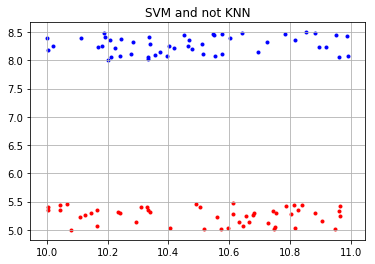

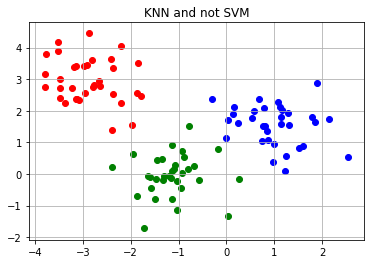

In [41]:
#Ideal for SVM, not for KNN
#Two parallel lines that are separable
#hard to classify along decision boundary

num_points = 50

vert_1 = 5
vert_2 = 8
y_1 = np.random.rand(num_points)/2+vert_1
y_2 = np.random.rand(num_points)/2+vert_2

x_1 = np.random.rand(num_points)+10
x_2 = np.random.rand(num_points)+10

plt.figure()
plt.scatter(x_1, y_1, marker = '.', c='r')
plt.scatter(x_2, y_2, marker = '.', c='b')
plt.grid()
plt.title("SVM and not KNN")


#Ideal for KNN, not for SVM
#multiple classes! used sklearn for this

from sklearn.datasets.samples_generator import make_blobs

centers = [(-3, 3), (1, 1.5), (-1.5, 0)]
cluster_std = [0.7, 0.7, 0.7]

X, y = make_blobs(n_samples=100, cluster_std=cluster_rad, centers=centers, n_features=2, random_state=1)

plt.figure()
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue")
plt.scatter(X[y == 2, 0], X[y == 2, 1], color="green")
plt.grid()
plt.title("KNN and not SVM")

### 4) K-NN Implementation
- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).

In [74]:
# Implement kNN by hand. It might be useful to store all distances in one array/list

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import operator

# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Preview dataset
iris_df.head()
train, test = np.split(iris_df, [int(.80*len(iris_df))])
trainX = train.drop(columns = "target")
trainY = train.target

testX = test.drop(columns = "target")
testY = test.target

## YOUR CODE HERE

def euclidDist (p1, p2, length):
    #calculates distance between two data points with the Euclidean norm
    distance = 0
    for x in range(length):
        distance+= np.square(p1[x]-p2[x])
    return np.sqrt(distance)

def knn(trainSet, newSample, k):
    #array to store euclidean distance between newSample and every point in training set
    distances = {}
    
    length = newSample.shape[0]
    
    for x in range(len(trainSet)):
        distance = euclidDist(newSample, trainSet.iloc[x], length)
        distances[x] = distance
        
    #sort points based on distances, retrieve first k rows
    sort = {}
    sort = sorted(distances.items(), key=operator.itemgetter(1))
    
    nearest = []
    for point in range(k):
            nearest.append(sort[point][0])
    
    #find out the class of each nearest neighbour
    neighb_class = {}
    
    for neighbour in range(len(nearest)):
            irisClass = trainSet.iloc[nearest[neighbour]][-1]
            if irisClass in neighb_class:
                neighb_class[irisClass] += 1
            else:
                neighb_class[irisClass] = 1
        
    sorted_neighb = sorted(neighb_class.items(), key=operator.itemgetter(1), reverse = True)
    return sorted_neighb[0][0]


#running model
k = 20
results = []
for iris in range(len(testX)):
    result = knn(train, testX.iloc[iris], k)
    results.append(result)
print(results)
print(testY)

total_correct=0

for point in range(len(results)):
    if results[point] == testY.iloc[point]:
        total_correct+=1
        
print("Accuracy: " +str((total_correct/(testY.size)*100)))
    


[2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0]
120    2.0
121    2.0
122    2.0
123    2.0
124    2.0
125    2.0
126    2.0
127    2.0
128    2.0
129    2.0
130    2.0
131    2.0
132    2.0
133    2.0
134    2.0
135    2.0
136    2.0
137    2.0
138    2.0
139    2.0
140    2.0
141    2.0
142    2.0
143    2.0
144    2.0
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, dtype: float64
Accuracy: 70.0


### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

# Bagging and Boosting:
Bagging and Boosting are ensemble techniques where several decision tree classifiers are combined to form a "stronger learner", increasing the accuracy of the model by reducing variance and bias that is picked up by each individual classifier. Both techniques retrieve N learners by generating new training data sets by random sampling with replacement from the original set (thus repeating some observations in subsequently generated training sets).

The difference between bagging and boosting is boosting accounts for WEIGHTED observations in the data, and thus the models run in a more sequential fashion, building off of the previous models' success. The weights are adjusted such that misclassified data are emphasized in subsequent classifiers, and the result is obtained by taking a weighted average of weights. In bagging, new learners are built in parallel and the final result is obtained by averaging the responses of each classifier.

With its account for weighted averages, boosting can generate a model with lower errors than a single model; however, if a single model is overfitting, then bagging is a better option (since the weighted averages used in boosting may augment the overfitting problem in the produced model).

# Decision Trees and Random Forests:

Decision trees is a classification model that uses layers that make binary decisions (if ___ then ____, else then ___) in a sequential route. Random Forests are collections of decision trees that aggregate decisions reached by individual trees into one final result.

Pros/Cons of Decision Trees:
- Easy to understand and visualize
- Fast, good for biiig datasets
- Works on quantitative and categorical data

However...
- Can overfit with increasing decision tree depth
- Diagonal decision boundaries 
- Greedy algorithm that calculates the optimal answer at each node rather than considering the global environment (optimal answer at the final node)

Pros/Cons of Random Forests:
- Reduces error/bias when contrasting with a single decision tree
- Not many hyperparameters to tune
- Decorrelates trees (in situation of using bagged decision trees)

However...
- Slower and more ineffective for real-life implementation 
- Less easy to interpret visually
- Basically trains pretty fast, predicts slow

### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

## YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC

# PCA vs. Autoencoders:
Principal Component Analysis is a technique of feature extraction to "drop" certain features of a dataset while retaining key features. The algorithm is as follows:
- Compute the covariance matrix of the data
- Compute the eigenvalues and vectors of the covariance matrix
- Use the obtained eigenvalues/vectors to extract certain features, transform data by projecting them onto a lower-dimension subspace

The mean is subtracted from the covariance matrix to "whiten the data", since we are aiming to find a feature subspace maximizing variance along these feature vectors and we need to normalize our data to properly measure the variance of these features.

In order to extract M' features from our existing M features, we need to find the largest eigenvalues and their M' corresponding eigenvectors that defines a new basis of our new feature space. It is important to find these eigenvalues/vectors because it is an indicator of how "spread out" the data is on the line/direction of the eigenvector.

In contrast, autoencoders are neural networks that try to learn a function that is an approximation to the 'identity function' after implementing a "bottleneck" in the network to compress the original input's representation of its features. PCA is limited to linear subspaces and transformations, so autoencoders are a more flexible model because it learns non-linear relationships. Thus a single layer autoencoder that learns a linear transfer function would result in the data being projected onto the same subspace that would result from implementing PCA.


### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [77]:
# loading the faces dataset
from sklearn.datasets import fetch_lfw_people

# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/Users/rosiezhao/anaconda3/lib/python3.6/site-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [81]:
X = lfw_people.data

[14128807.0, 15280253.0, 15970708.0, 16849688.0, 17649870.0, 18083826.0, 19662750.0, 20455566.0, 21860646.0, 22832008.0, 23809358.0, 27488192.0, 29294858.0, 30717006.0, 32617594.0, 35111840.0, 35987536.0, 41078420.0, 50180932.0, 53856300.0, 63915616.0, 67940200.0, 70277070.0, 82552460.0, 101140640.0, 171418770.0, 201243070.0, 242401760.0, 502443780.0, 627988350.0]
[[254.       254.       251.66667  ...  87.333336  88.666664  86.666664]
 [ 39.666668  50.333332  47.       ... 117.666664 115.       133.66667 ]
 [ 89.333336 104.       126.       ... 175.33333  183.33333  183.      ]
 ...
 [122.       118.333336 113.       ...  73.333336  64.        54.666668]
 [ 47.333332  49.        50.333332 ... 103.666664 108.       112.333336]
 [128.33333  140.       135.66667  ...  74.333336  77.        73.666664]]
[[ 33.666668  52.333332  69.333336 ...  11.333333  15.        24.666666]
 [ 60.333332  58.333332  89.666664 ...  65.666664  91.       152.      ]
 [138.33333  137.33333  143.33333  ... 146.

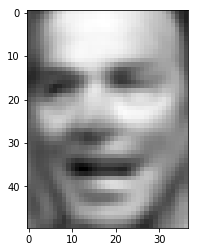

In [83]:
# plot an example image
plt.imshow(X[1].reshape(h,w), cmap = 'gray')

### insert your code here ###
from sklearn.decomposition import PCA

X_mean = np.average(X, axis=0)
X_bar = X-X_mean
sigma = X_bar.T.dot(X_bar)

eigenvalues, _ = np.linalg.eig(sigma)
eigenvalues = sorted(eigenvalues)
print(eigenvalues[len(eigenvalues)-30:])

pca = PCA(n_components=50, whiten=True)
X_pca = pca.fit_transform(X)
X_recon = pca.inverse_transform(X_pca)
plt.imshow(X_recon[1].reshape(h,w), cmap = 'gray')

In [93]:
from sklearn.neighbors import KNeighborsClassifier as KNC
trainX, testX = np.split(X, [int(0.8*len(iris_df))])
trainY, testY =np.split(y, [int(0.8*len(iris_df))])
knn = KNC(n_neighbors=10)
knn = knn.fit(trainX, trainY)
pred = knn.predict(testX)
        
correct = 0
for x in range(len(pred)):
    if pred[x] == testY[x]:
        correct+=1

correct = correct/len(pred) * 100
print("Accuracy: " + str(correct))




Accuracy: 45.63356164383562


## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [60]:
### your code below ###
#will definitely do this in my own time :) midterm season is rough tho